# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv(r'data/sat_2017.csv')
act_2017 = pd.read_csv(r'data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [6]:
# Which row has the erroneous Science score?
act_2017[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [7]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
# Which row has the erroneous Math score
sat_2017[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
# Which one of the rows is a string?
find_str_chars = act_2017['Composite'].str.contains('[a-zA-Z]' , regex=True, case=True)

In [10]:
act_2017.loc[find_str_chars, :]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The data shows a breakdown of each state's ACT/SAT data, including one row for the national averages. The datasets include the following features:
- **Participation (%)**: I assume this is the percentage of students who took the tests
- **English**: The results of the english exam
- **Math**: The results of the math exam
- **Reading**: The results of the reading exam
- **Science**: The results of the science exam
- **Composite**: I assume this is the average of all the other exams

#### 4a. Does the data look complete? 

Yes, the data looks complete

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

- In the SAT, Maryland's Math score is wrong, should be 542  
- In the ACT, Maryland's Science score is wrong, should be 23.2 based on source data located [here](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf)  
- In the ACT, Wyoming's Composite has an extraneous letter 'x'

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
# Checking datatypes

print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

- In the **ACT** dataframe, the composite column is listed as an object, but it should be a float
- In both the **SAT and ACT** dataframes, the participation column is listed as an object, should be float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
# Got this idea from https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv
# I use this function later in the code inside of another function

def convert_pct_string_to_float(dataframe, column):
    # Strip off %, convert to float, div by 100
    remove_pct_and_float = lambda x: float(x.strip('%')) / 100
    dataframe[column] = dataframe[column].apply(remove_pct_and_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
def change_state_values(dataframe, state, column, new_value):
    find_state_and_column = dataframe['State'] == state.title(), column.title()
    dataframe.loc[find_state_and_column] = new_value

In [14]:
def remove_last_letter_from_state_feature(dataframe, state, column):
    # Creating a variable for the lambda function needed to remove the last letter from a state feature's value
    lambda_remove_last_char = lambda row: row[column][:-1] if row['State'] == state else row[column]
    
    # Remove the last letter! Idea for this came from a codecademy lesson on lambda functions
    dataframe[column] = dataframe.apply(lambda_remove_last_char, axis=1)

In [15]:
# Fixing Maryland in sat_2017 by changing 52 to 524, based on source data

change_state_values(sat_2017, 'Maryland', 'Math', 524)

In [16]:
# Fixing Wyoming by removing the extraneous x

remove_last_letter_from_state_feature(act_2017, 'Wyoming', 'Composite')

In [17]:
# Change strings to floats

def convert_string_to_float(dataframe, column):
    # float each value in the dataframe
    value_to_float = lambda x: float(x)
    dataframe[column] = dataframe[column].apply(value_to_float)

In [18]:
# Turning strings into floats

convert_string_to_float(act_2017, 'Composite')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
# Checking Wyoming's Composite value
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] 

51    20.2
Name: Composite, dtype: float64

- Display the data types again to confirm they are correct.

In [20]:
#Code:
sat_2017.dtypes
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
# referencing act_2017 column names

act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [22]:
def add_suffix_to_column_names(dataframe, string_to_add):
    column_names = list(dataframe.columns)
    for i in range(len(column_names)):
        # Rename each column inplace so I don't need to make a new dataframe
        dataframe.rename(columns={column_names[i]: f'{column_names[i]}{string_to_add}'}, inplace=True)       

In [23]:
def lowercase_column_names(dataframe):
    dataframe.columns = map(str.lower, dataframe.columns) # Got this idea from Chris Albon's website (https://chrisalbon.com/python/data_wrangling/pandas_lowercase_column_names/)

In [24]:
def remove_spaces_and_dashes_from_column_names(dataframe):
    column_names = list(dataframe.columns)
    items_to_replace = '- '
    for character in items_to_replace:
        column_names = list(dataframe.columns) # Need to update column_names so the .rename() method is referencing the new names
        for i in range(len(column_names)):
            if character in column_names[i]:
                # Got this idea to use .rename() from a codecademy lesson last year
                dataframe.rename(columns={column_names[i]: column_names[i].replace(character, '_')}, inplace=True) # inplace effectively updates the dataframe without setting a new variable

In [25]:
# I got tired of doing the same steps over and over, so here's a function that does all the steps

def clean_dataframes(dataframe, suffix): # needs a column called 'Participation'
    convert_pct_string_to_float(dataframe, 'Participation')
    dataframe.columns = dataframe.columns.str.lower() # make column names lowercase
    remove_spaces_and_dashes_from_column_names(dataframe)
    add_suffix_to_column_names(dataframe, suffix)
    dataframe.rename(columns={f'state{suffix}': 'state'}, inplace=True) # rename state column to generic state

In [26]:
# Cleaning the 2017 data with my new function

dataframes_to_clean = [(act_2017, '_act_2017'), (sat_2017, '_sat_2017')]
for dataframe, suffix in dataframes_to_clean:
    clean_dataframes(dataframe, suffix)

In [27]:
act_2017.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')

In [28]:
sat_2017.rename(columns={'evidence_based_reading_and_writing_sat_2017': "ebrw_sat_2017"}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [29]:
act_2017.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat_2017|The state within the United States| 
|**participation_sat_2017**|*float*|sat_2017|Percentage of students who took the SAT exam, represented in decimals|
|**evidence_based_reading_and_writing_sat_2017**|*integer*|sat_2017|The average score for the Evidence-based Reading and Writing portion of the SAT exam. The maximum possible score is 800|
|**math_sat_2017**|*integer*|sat_2017|The average score for the Math portion of the SAT exam. The maximum possible score is 800|
|**total_sat_2017**|*integer*|sat_2017|The total of the averages of both portions of the SAT exam. The maximum possible value is 1600|
|**participation_act_2017**|*float*|act_2017|Percentage of students who took the ACT exam|
|**english_act_2017**|*float*|act_2017|The average score for the English portion of the ACT exam. The minimum possible score is 1, maximum is 36|
|**math_act_2017**|*float*|act_2017|The average score for the Math portion of the ACT exam. The minimum possible score is 1, maximum is 36|
|**reading_act_2017**|*float*|act_2017|The average score for the Reading portion of the ACT exam. The minimum possible score is 1, maximum is 36|
|**science_act_2017**|*float*|act_2017|The average score for the Science portion of the ACT exam. The minimum possible score is 1, maximum is 36|
|**composite_act_2017**|*float*|act_2017|The average of the scores from all the portions of the ACT exam. The minimum possible score is 1, maximum is 36|




#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
# Dropped the "National Average" row

act_2017 = act_2017.drop(index=0).reset_index(drop=True) # resetting the index so they match across dataframes
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
#Code:
combined_2017 = pd.merge(act_2017, sat_2017, how='left', on='state')

In [32]:
combined_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
combined_2017.to_csv('data/combined_2017.csv', encoding='utf-8')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [34]:
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018.csv')

In [35]:
# Dropping duplicate of Maine row
act_2018 = act_2018.drop_duplicates().reset_index(drop=True)

In [36]:
# fixing capitalization error in district of columbia
act_2018.loc[act_2018['State'] == 'District of columbia', 'State'] = 'District of Columbia'

In [37]:
# Cleaning the 2018 data
dataframes_to_clean = [(act_2018, '_act_2018'), (sat_2018, '_sat_2018')]
for dataframe, suffix in dataframes_to_clean:
    clean_dataframes(dataframe, suffix)

In [38]:
# renaming evidence based reading and writing to better column title
sat_2018.rename(columns={"evidence_based_reading_and_writing_sat_2018": "ebrw_sat_2018"}, inplace=True)

In [39]:
# Merge 2018 data
combined_2018 = pd.merge(sat_2018, act_2018, how='left', on='state')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
# Merge sat and act 2018
combined_2018 = pd.merge(sat_2018, act_2018, how='left', on='state')

In [41]:
# Save it as a file
combined_2018.to_csv('data/combined_2018.csv')

In [42]:
# Merge combined 2017 and 2018 data
combined_2017_2018 = pd.merge(combined_2017, combined_2018, how='left', on='state')

In [43]:
# Save it as a file
combined_2017_2018.to_csv('data/combined_2017_2018.csv')

### Cleaning and merging 2019 SAT/ACT data

In [44]:
sat_2019 = pd.read_csv('data/sat_2019.csv', encoding='latin-1')
act_2019 = pd.read_csv('data/act_2019.csv', encoding='utf-8')

In [45]:
sat_2019.rename(columns={'Participation Rate': 'Participation'}, inplace=True)

In [46]:
sat_2019.loc[sat_2019['Participation'] == 'Ñ', 'Participation'] = 'NaN'

In [47]:
# cleaning the 2019 data
dataframes_to_clean = [(act_2019, '_act_2019'), (sat_2019, '_sat_2019')]
for dataframe, suffix in dataframes_to_clean:
    clean_dataframes(dataframe, suffix)

In [48]:
# removing the "national" row from act_2019
act_2019 = act_2019[act_2019['state'] != 'National'].reset_index(drop=True)

In [49]:
combined_2019 = pd.merge(sat_2019, act_2019, on='state', how='left')

In [50]:
combined_2019.to_csv('data/combined_2019.csv')

In [51]:
final = pd.merge(combined_2017_2018, combined_2019, on='state', how='right')

In [52]:
indexes_to_drop = final.index[(final['state'] == 'Puerto Rico') | (final['state'] == 'Virgin Islands')].tolist()

In [53]:
final = final.drop(indexes_to_drop).reset_index(drop=True)

In [54]:
final.to_csv('data/final.csv')

## Exploratory Data Analysis

- [Summary Statistics](#Summary-Statistics)
- Top and Bottom 5 states
 - [by Participation Rate](#Participation-Rates)
 - [by Composite Scores](#Composite-Scores)
 
### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
ebrw_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [56]:
#code
def std(x_list):
    n = len(x_list)
    mean =  sum(x_list) / n
    total_sum = 0
    for x in x_list:
        total_sum += ((x - mean) ** 2)   
    return ((1 / n) * total_sum) ** .5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
sd = {column: std(final[column]) for column in final.describe().keys()}

In [58]:
sd

{'participation_act_2017': 0.3182417575123181,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 3.1511078954644076,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 0.3492907076664507,
 'ebrw_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'participation_sat_2018': 0.3694661922353942,
 'ebrw_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433,
 'participation_act_2018': 0.33701735820410317,
 'composite_act_2018': 2.090779082141178,
 'participation_sat_2019': 0.3836584048685726,
 'ebrw_sat_2019': 45.792378682545134,
 'math_sat_2019': 50.78521461840036,
 'total_sat_2019': 96.24027185617864,
 'participation_act_2019': 0.3417582373703047,
 'composite_act_2019': 2.172901153595978}

In [59]:
np.std(final)

participation_act_2017     0.318242
english_act_2017           2.330488
math_act_2017              1.962462
reading_act_2017           2.046903
science_act_2017           3.151108
composite_act_2017         2.000786
participation_sat_2017     0.349291
ebrw_sat_2017             45.216970
math_sat_2017             46.657134
total_sat_2017            91.583511
participation_sat_2018     0.369466
ebrw_sat_2018             47.034610
math_sat_2018             47.301946
total_sat_2018            93.227424
participation_act_2018     0.337017
composite_act_2018         2.090779
participation_sat_2019     0.383658
ebrw_sat_2019             45.792379
math_sat_2019             50.785215
total_sat_2019            96.240272
participation_act_2019     0.341758
composite_act_2019         2.172901
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

They match up with numpy's std, method, but not pandas describe. Hmmm

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states have > 50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [60]:
def filter_columns(year, test_name, show_states=True):
    # returns column names
    filter_with_states = final.columns[(final.columns.str.contains(year))
                                       & (final.columns.str.contains(test_name)) 
                                       | (final.columns.str.contains('state'))]
    filter_without_states = final.columns[(final.columns.str.contains(year))
                                       & (final.columns.str.contains(test_name))]
    if show_states == True:
        return filter_with_states
    else:
        return filter_without_states
    

In [61]:
# 2017 column filtering
columns_2017_act = filter_columns('2017', 'act') # don't need show_states=True, it's true by default
columns_2017_sat = filter_columns('2017', 'sat')

# 2017 dataframe creation
act_2017 = final[columns_2017_act]
sat_2017 = final[columns_2017_sat]

In [62]:
# 2018 column filtering
columns_2018_act = filter_columns('2018', 'act')
columns_2018_sat = filter_columns('2018', 'sat')

# 2018 dataframe creation
act_2018 = final[columns_2018_act]
sat_2018 = final[columns_2018_sat]

In [63]:
# 2019 column filtering
columns_2019_act = filter_columns('2019', 'act')     
columns_2019_sat = filter_columns('2019', 'sat')

# 2019 dataframe creation
act_2019 = final[columns_2019_act]
sat_2019 = final[columns_2019_sat]

In [64]:
# Top number of results for a dataframe and column. Can change ascending to false

def top_or_bottom_n(dataframe, column, num_results, ascending=True):
    return dataframe[['state', column]].sort_values(by=column, ascending=ascending).head(num_results)

## Participation Rates

Below, I look at the participation rates from 2017-2019 ACT and SAT data

In [65]:
# lowest 5 ACT 2017
top_or_bottom_n(act_2017, 'participation_act_2017', 5)

,state,participation_act_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [66]:
# bottom 5 participation ACT 2018
top_or_bottom_n(act_2018, 'participation_act_2018', 5)

,state,participation_act_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [67]:
# bottom 5 participation ACT 2019
top_or_bottom_n(act_2019, 'participation_act_2019', 5)

,state,participation_act_2019
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13
29,New Hampshire,0.14
38,Pennsylvania,0.17


In [68]:
# highest 20 ACT 2017
top_or_bottom_n(act_2017, 'participation_act_2017', 20, ascending=False)

,state,participation_act_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


Many states had 100% participation, why is that?

In [69]:
# top 20 participation ACT 2018
top_or_bottom_n(act_2018, 'participation_act_2018', 20, ascending=False)

,state,participation_act_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


Again, a lot of states with 100% - need to investigate why

In [70]:
#Top 15 participation ACT 2019
top_or_bottom_n(act_2019, 'participation_act_2019', 15, ascending=False)

,state,participation_act_2019
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
36,Oklahoma,1.0
35,Ohio,1.0
33,North Carolina,1.0
28,Nevada,1.0
27,Nebraska,1.0


Again, a lot of states with 100%, 
Why are there less, though? Need to see which states don't have 100% now.

In [71]:
# bottom 5 participation rates in SAT 2017
top_or_bottom_n(sat_2017, 'participation_sat_2017', 5)

,state,participation_sat_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [72]:
# bottom 5 participation rates in SAT 2018
top_or_bottom_n(sat_2018, 'participation_sat_2018', 5)

,state,participation_sat_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


North Dakota still lowest, but where did the other states go?

In [73]:
# bottom 5 participation rates in SAT 2019
top_or_bottom_n(sat_2019, 'participation_sat_2019', 5)

,state,participation_sat_2019
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


North Dakota still lowest, now this is the same as 2018, so something happened between 2017, 2018 in Miss. Iowa, Missouri Utah

In [74]:
# top 5 participation rates in SAT 2017
top_or_bottom_n(sat_2017, 'participation_sat_2017', 5, ascending=False)

,state,participation_sat_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [75]:
# top 5 participation rates in SAT 2018, these are the top 5, no other 100% 
top_or_bottom_n(sat_2018, 'participation_sat_2018', 5, ascending=False)

,state,participation_sat_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


DC and New Hampshire are gone

In [76]:
# top 8 participation rates in SAT 2019, these are the top 8, no other 100% 
top_or_bottom_n(sat_2019, 'participation_sat_2019', 8, ascending=False)

,state,participation_sat_2019
39,Rhode Island,1.0
13,Illinois,1.0
22,Michigan,1.0
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
9,Florida,1.0
12,Idaho,1.0


More states at 100%, did they institute mandatory SAT testing?

## Composite Scores

Here, I explore the highest and lowest composite scores per state for 2017-2019 ACT & SAT data

In [77]:
# lowest 5 composite scores ACT 2017
top_or_bottom_n(act_2017, 'composite_act_2017', 5)

,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [78]:
# bottom 5 composite scores ACT 2018
top_or_bottom_n(act_2018, 'composite_act_2018', 5)

,state,composite_act_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [79]:
# bottom 5 composite scores ACT 2019
top_or_bottom_n(act_2019, 'composite_act_2019', 5)

,state,composite_act_2019
28,Nevada,17.9
24,Mississippi,18.4
40,South Carolina,18.8
18,Louisiana,18.8
0,Alabama,18.9


Nevada takes the lowest spot all 3 years
Hawaii is no longer in the bottom 5. Seems like the lowest scores are getting lower, want to calculate this more

In [80]:
# highest 5 composite scores for ACT 2017
top_or_bottom_n(act_2017, 'composite_act_2017', 5, ascending=False)

,state,composite_act_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [81]:
# top 5 composite scores ACT 2018
top_or_bottom_n(act_2018, 'composite_act_2018', 5, ascending=False)

,state,composite_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


In [82]:
# top 5 composite scores ACT 2019
top_or_bottom_n(act_2019, 'composite_act_2019', 5, ascending=False)

,state,composite_act_2019
21,Massachusetts,25.5
6,Connecticut,25.5
29,New Hampshire,25.0
39,Rhode Island,24.7
32,New York,24.5


States with lower participation rates seem to get higher scores - Rhode Island and New Hampshire had some of the lowest participation rates

In [83]:
# bottom 5 total scores in SAT 2017
top_or_bottom_n(sat_2017, 'total_sat_2017', 5)

,state,total_sat_2017
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


In [84]:
# bottom 5 total scores rates in SAT 2018
top_or_bottom_n(sat_2018, 'total_sat_2018', 5)

,state,total_sat_2018
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


In [85]:
# bottom 5 total scores in SAT 2019
top_or_bottom_n(sat_2019, 'total_sat_2019', 5)

,state,total_sat_2019
48,West Virginia,943
36,Oklahoma,963
8,District of Columbia,975
7,Delaware,985
12,Idaho,993


In [86]:
# top 5 total scores in SAT 2017
top_or_bottom_n(sat_2017, 'total_sat_2017', 5, ascending=False)

,state,total_sat_2017
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [87]:
# top 5 total scores rates in SAT 2018
top_or_bottom_n(sat_2018, 'total_sat_2018', 5, ascending=False)

,state,total_sat_2018
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


In [88]:
# top 5 total scores in SAT 2019
top_or_bottom_n(sat_2019, 'total_sat_2019', 5, ascending=False)

,state,total_sat_2019
23,Minnesota,1284
49,Wisconsin,1283
41,South Dakota,1268
34,North Dakota,1263
27,Nebraska,1260


## Other Explorations

Checking to see which states drop their 100% participation rates from year to year in the ACT:

In [89]:
act_2017_100_participation = act_2017[act_2017['participation_act_2017'] == 1.0]['state'].tolist()

In [90]:
act_2018_100_participation = act_2018[act_2018['participation_act_2018'] == 1.0]['state'].tolist()

In [91]:
act_2019_100_participation = act_2019[act_2019['participation_act_2019'] == 1.0]['state'].tolist()

In [92]:
# got this idea from https://www.kite.com/python/answers/how-to-combine-two-lists-while-removing-duplicates-in-the-new-list-and-keeping-duplicates-in-original-list-in-python
set(act_2017_100_participation) - set(act_2018_100_participation)

{'Colorado', 'Minnesota'}

In [93]:
set(act_2018_100_participation) - set(act_2019_100_participation)

{'Missouri', 'South Carolina'}

In [94]:
set(act_2017_100_participation) - set(act_2019_100_participation) 

{'Colorado', 'Minnesota', 'Missouri', 'South Carolina'}

In [95]:
# Colorado, Minnesota, Missouri, and South Carolina didn't have 100% completion across years. Why?

### Now let's look at the SATs and see who joined the 100% completion ranks

In [96]:
sat_2017_100_participation = sat_2017[sat_2017['participation_sat_2017'] == 1.0]['state'].tolist()

In [97]:
sat_2018_100_participation = sat_2018[sat_2018['participation_sat_2018'] == 1.0]['state'].tolist()

In [98]:
sat_2019_100_participation = sat_2019[sat_2019['participation_sat_2019'] == 1.0]['state'].tolist()

In [99]:
# subtracting earlier years FROM later years to see which states BECAME 100% participation states
set(sat_2018_100_participation) - set(sat_2017_100_participation)

{'Colorado', 'Idaho'}

In [100]:
set(sat_2019_100_participation) - set(sat_2018_100_participation)

{'Florida', 'Illinois', 'Rhode Island'}

In [101]:
set(sat_2019_100_participation) - set(sat_2017_100_participation) 

{'Colorado', 'Florida', 'Idaho', 'Illinois', 'Rhode Island'}

### Colorado, Florida, Idaho, Illinois, and Rhode Island all had 100% completion starting 2019. Why?

## Do any states have more than 50% completion on both tests?

In [103]:
final[(sat_2017['participation_sat_2017'] > 0.5) & (act_2017['participation_act_2017'] > 0.5)][['state', 'participation_sat_2017', 'participation_act_2017']]

,state,participation_sat_2017,participation_act_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [104]:
final[(sat_2018['participation_sat_2018'] > 0.5) & (act_2018['participation_act_2018'] > 0.5)][['state', 'participation_sat_2018', 'participation_act_2018']]

,state,participation_sat_2018,participation_act_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [105]:
final[(sat_2019['participation_sat_2019'] > 0.5) & (act_2019['participation_act_2019'] > 0.5)][['state', 'participation_sat_2019', 'participation_act_2019']]

,state,participation_sat_2019,participation_act_2019
9,Florida,1.00,0.54
11,Hawaii,0.54,0.80
33,North Carolina,0.51,1.00
40,South Carolina,0.68,0.78


Florida, Georgia, Hawaii, North Carolina, and South Carolina all have above 50% participation across tests. They still seem to be skewed toward one test or the other. Florida was the only even one until 2019

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

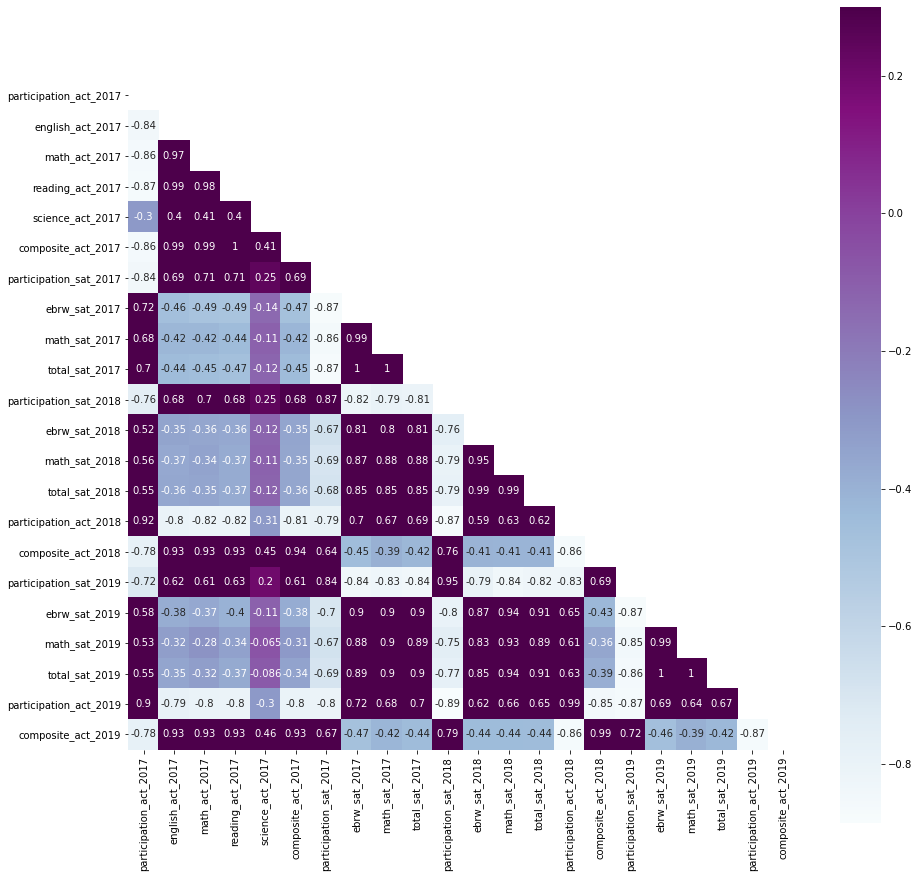

In [107]:
plt.figure(figsize=(15, 15))
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(final.corr(), mask=mask, vmax=.3, square=True, annot=True, cmap='BuPu');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [108]:
def subplot_histograms_general(dataframe, column_first_word, test, year, list_of_xlabels):
    list_of_columns = final.columns[final.columns.str.contains(f'{column_first_word}_{test}')].tolist()
    list_of_titles = [f'{num} {test.upper()} {column_first_word.title()} by State' for num in range(year, year + len(list_of_columns))]
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(12, 4), nrows=nrows, ncols=3) # You'll want to specify your figsize
    fig.tight_layout(pad=5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=15) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]);

In [109]:
# creating labels of interest


In [110]:
xlabels_act_composite = ['Composite Score (1 to 36)'] * 3

In [111]:
xlabels_sat_participation = ['Percentage Participation (0 to 1)'] * 3

In [112]:
xlabels_sat_total = ['Total Score (1 to 1600)'] * 3

In [113]:
xlabels_act_participation = ['Percentage Participation (0 to 1)'] * 3

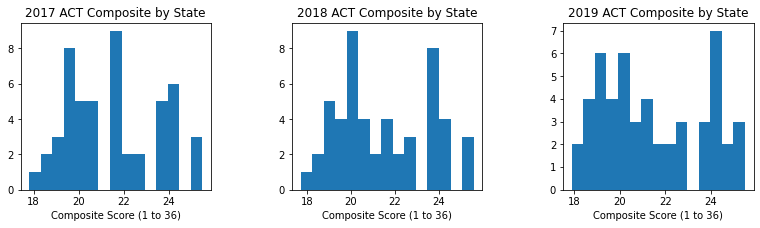

In [114]:
subplot_histograms_general(final, 'composite', 'act', 2017, xlabels_act_composite)

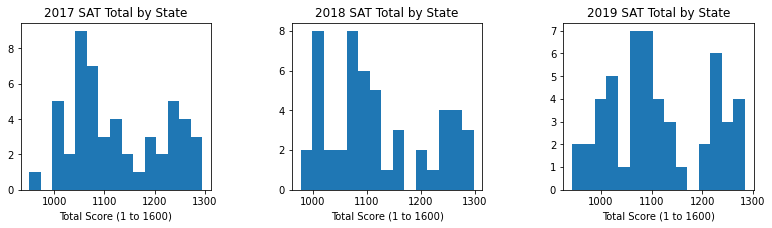

In [115]:
subplot_histograms_general(final, 'total', 'sat', 2017, xlabels_sat_total)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

# Participation Rates

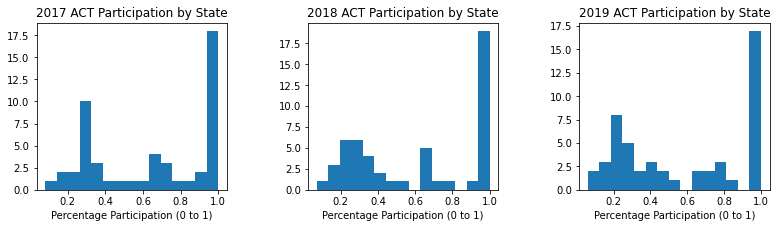

In [116]:
subplot_histograms_general(final, 'participation', 'act', 2017, xlabels_act_participation)

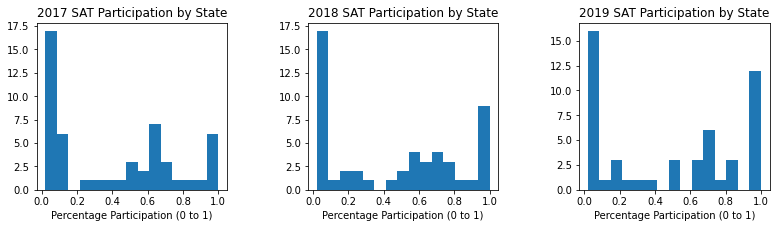

In [117]:
subplot_histograms_general(final, 'participation', 'sat', 2017, xlabels_sat_participation)

# Math Scores

In [118]:
# Outputs the title as "{Year} {Test} {Subject} Scores by State"
def subplot_histograms_scores(dataframe, column_first_word, test, year, list_of_xlabels):
    list_of_columns = final.columns[final.columns.str.contains(f'{column_first_word}_{test}')].tolist()
    list_of_titles = [f'{num} {test.upper()} {column_first_word.title()} Scores by State' for num in range(year, year + len(list_of_columns))]
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(12, 4), nrows=nrows, ncols=3) # You'll want to specify your figsize
    fig.tight_layout(pad=5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=15) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]);

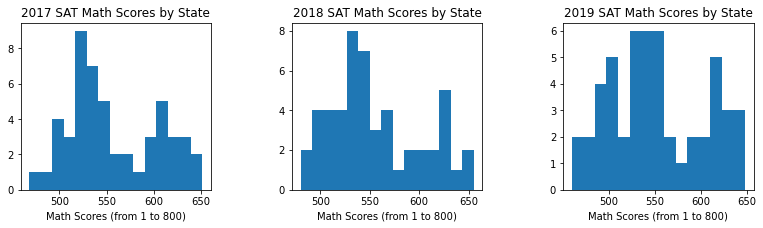

In [119]:
math_sat_xlabels = ['Math Scores (from 1 to 800)'] * 3
subplot_histograms_scores(final, 'math', 'sat', 2017, math_sat_xlabels)

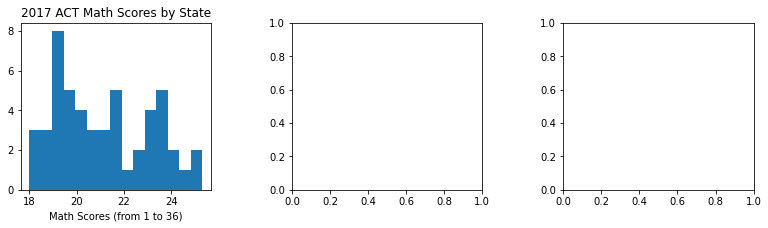

In [120]:
math_act_xlabels = ['Math Scores (from 1 to 36)']
subplot_histograms_scores(final, 'math', 'act', 2017, math_act_xlabels)

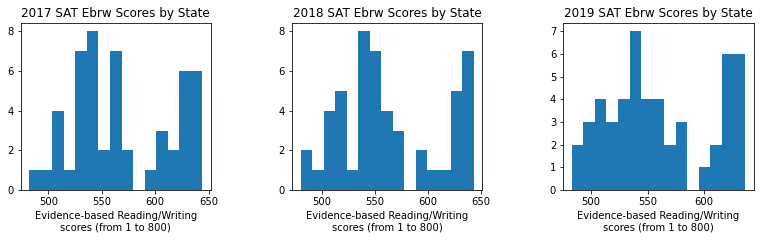

In [121]:
erbw_xlabels = ['Evidence-based Reading/Writing\nscores (from 1 to 800)'] * 3 
subplot_histograms_scores(final, 'ebrw', 'sat', 2017, erbw_xlabels)

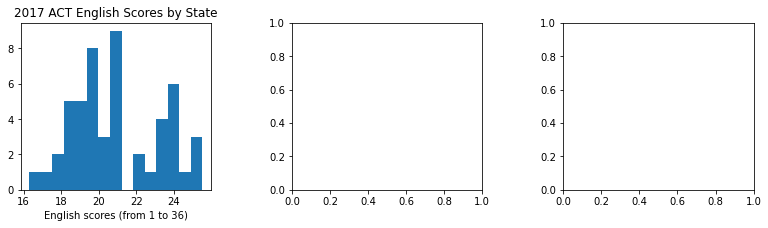

In [122]:
english_xlabels = ['English scores (from 1 to 36)'] * 3 
subplot_histograms_scores(final, 'english', 'act', 2017, english_xlabels)

Looks like the general distribution of each of these tests is similar!

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [123]:
list_of_titles = [["2017 SAT Math Score vs. 2017 ACT Math Score"], ['2017 SAT EBRW Score vs. 2017 ACT English Score'],
                 ['2017 SAT Total Score vs. 2017 ACT English Score'], ['2017 SAT Total Score vs. 2018 SAT Total Score'],
                 ['2017 ACT Composite Score vs. 2018 ACT Composite Score']]

list_of_labels = [['2017 SAT Math Scores', '2017 ACT Math Scores'], ['2017 SAT EBRW Scores', '2017 ACT English Scores'],
                 ['2017 SAT Total Score', '2017 ACT Composite Score'], ['2017 SAT Total Score', '2018 SAT Total Score'],
                 ['2017 ACT Composite Score', '2018 ACT Composite Score']]

list_of_columns = [['math_sat_2017', 'math_act_2017'], ['ebrw_sat_2017', 'english_act_2017'], ['total_sat_2017', 'composite_act_2017'],
                  ['total_sat_2017', 'total_sat_2018'], ['composite_act_2017', 'composite_act_2018']]

In [146]:
''.join(list_of_titles[0])

'2017 SAT Math Score vs. 2017 ACT Math Score'

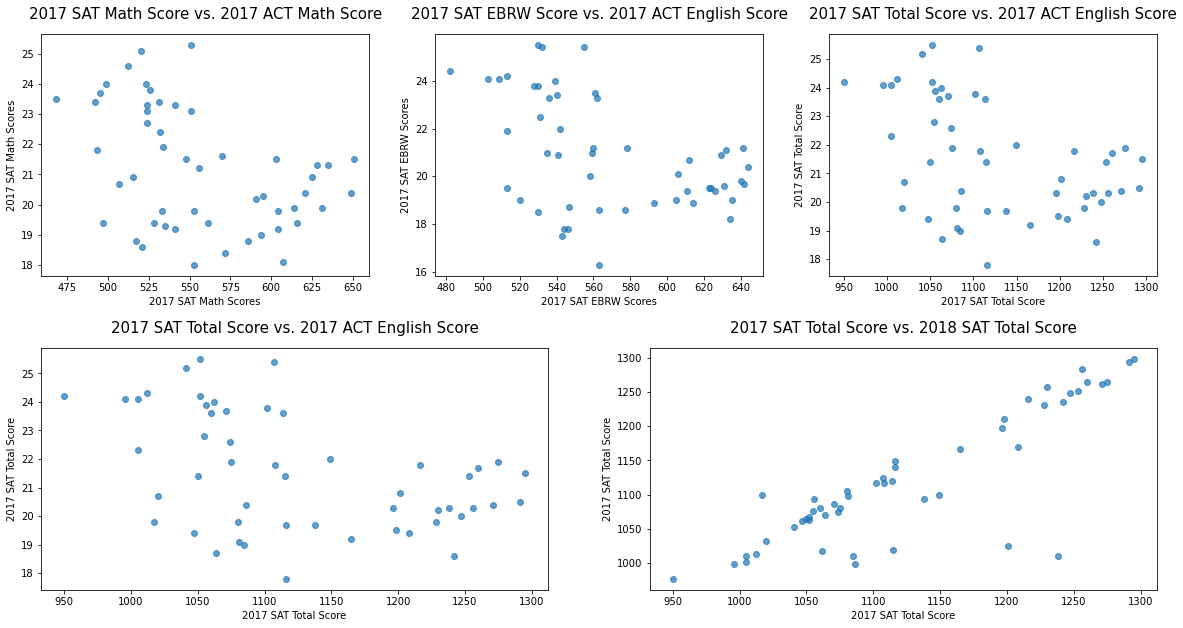

In [183]:
# define function for scatterplots
def subplot_scatterplot_scores(dataframe, list_of_column_pairs, list_of_titles, list_of_labels):
    fig, ax = plt.subplots(figsize=(20, 16))
    for i, column_pair in enumerate(list_of_column_pairs):
        if i <= 2:
            i += 1
            subplot = int(str(3) + str(3) + str(i))
            plt.subplot(subplot)
            i -= 1
            plt.scatter(final[list_of_column_pairs[i][0]], final[list_of_column_pairs[i][1]], alpha=0.7)
            plt.title(''.join(list_of_titles[i]), fontsize=15, pad=15)
            plt.xlabel(list_of_labels[i][0])
            plt.ylabel(list_of_labels[i][0])
        else:
            subplot = int(str(3) + str(2) + str(i))
            plt.subplot(subplot)
            i -= 1
            plt.scatter(final[list_of_column_pairs[i][0]], final[list_of_column_pairs[i][1]], alpha=0.7)
            plt.title(''.join(list_of_titles[i]), fontsize=15, pad=15)
            plt.xlabel(list_of_labels[i][0])
            plt.ylabel(list_of_labels[i][0])
            fig.subplots_adjust(hspace = 0.3)

title = ["2017 SAT Math Score vs. 2017 ACT Math Score"]
labels = ['2017 SAT Math Scores', '2017 ACT Math Scores']
subplot_scatterplot_scores(final, list_of_columns, list_of_titles, list_of_labels)

In general, 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: